<a href="https://colab.research.google.com/github/waghashvini/Test/blob/master/WalkRunClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("walkrun.csv")

In [ ]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## Domain Analysis

## Basic checks

In [ ]:
df.shape

(88588, 11)

In [ ]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
df.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
# data is continous numaric & target is discrite/categorical
#88588 Rows & 11 column

In [ ]:
#displaying statistical information
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [ ]:
#here std() of any column is not Zero so no constant column which we can not drop any single column

In [ ]:
#searching for null values
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
# findings unique values of a column
df.nunique()

date                 12
time              88588
username              1
wrist                 2
activity              2
acceleration_x    30307
acceleration_y    23957
acceleration_z    19698
gyro_x            40988
gyro_y            38957
gyro_z            51296
dtype: int64

In [ ]:
# from above information we can say that wrist activity havind 2 unique values

In [ ]:
df['wrist'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['activity'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['activity'].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

In [ ]:
#by analsying the target column ,we can get to know whether the data is balanced or not
# 0 44223 rows info, 1 44365 rows of info

#Difference = |44365 - 44223| = 142

#Total samples = 44365 + 44223 = 88588

#Percentage difference:(142/88588)×100=0.16

#hence wecansay that, the data is very well balanced — both classes have almost the same number of records.
#A difference of only 0.16% is negligible in most machine learning tasks.
#So, no need for oversampling or undersampling techniques required here.


## EDA
Exploratory Data Analysis


In [ ]:
#df.head()

<Axes: xlabel='activity', ylabel='count'>

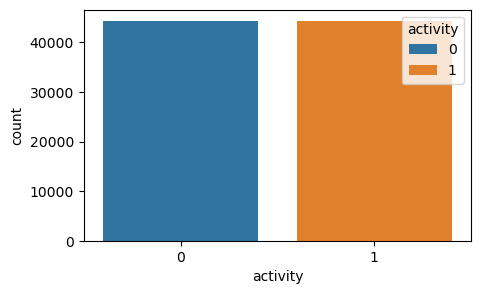

In [ ]:
# target column is  activity  is of descrite data
# count plot
plt.figure(figsize=(5,3))
sns.countplot(x=df['activity'],hue=df['activity'])

Insight: both class occurance is same. Data is more balanced.

In [ ]:
#df.head()

<Axes: xlabel='wrist', ylabel='count'>

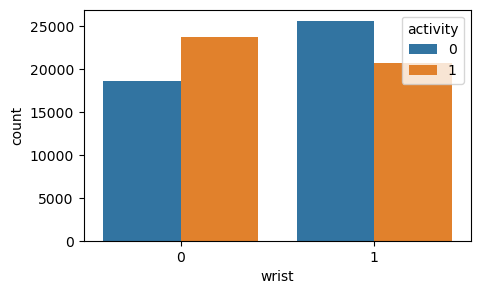

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['wrist'],hue=df['activity'])

In [ ]:
#df.info()

In [ ]:
# here we can drop date,time,username as it is non numaric data
#here target is activity (walk/Run) for that these three columns are not required I think so drop.
df.drop(['date','time','username'],axis=1,inplace=True)
df.head()


,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


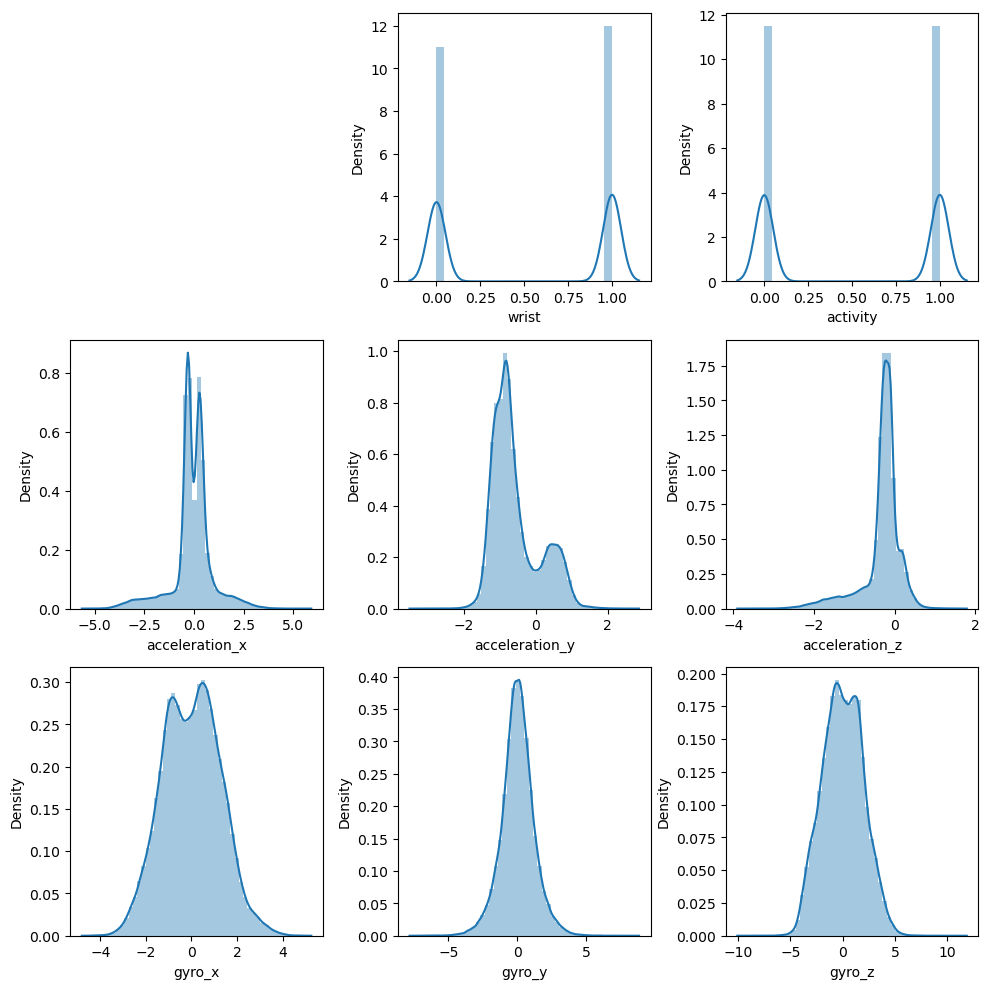

In [ ]:
#SUBPLOT
plt.figure(figsize=(10,10))
plot = 2

for i in df:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(x=df[i])
        plt.xlabel(i)
    plot+=1
plt.tight_layout()


insight: from above we see the distribution of datase of each columns
every column from above graph show that data is not normal or some distortion in the each column


In [ ]:
#Insights: gyro_y is the column which is normaly distributed other than that are having some distortions or not normal distributed ,probbabelity of outliers

In [ ]:
## Bivariate

In [ ]:
df.columns

Index(['wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

<Axes: xlabel='acceleration_x', ylabel='Count'>

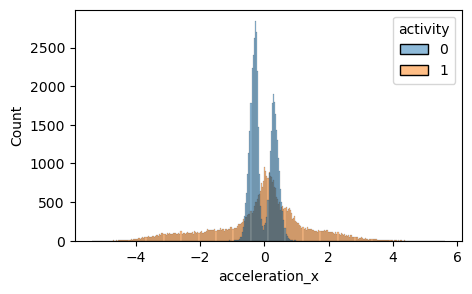

In [ ]:
# analyse all the input varibales vs target
plt.figure(figsize=(5,3))
sns.histplot(x=df['acceleration_x'],hue=df['activity'])

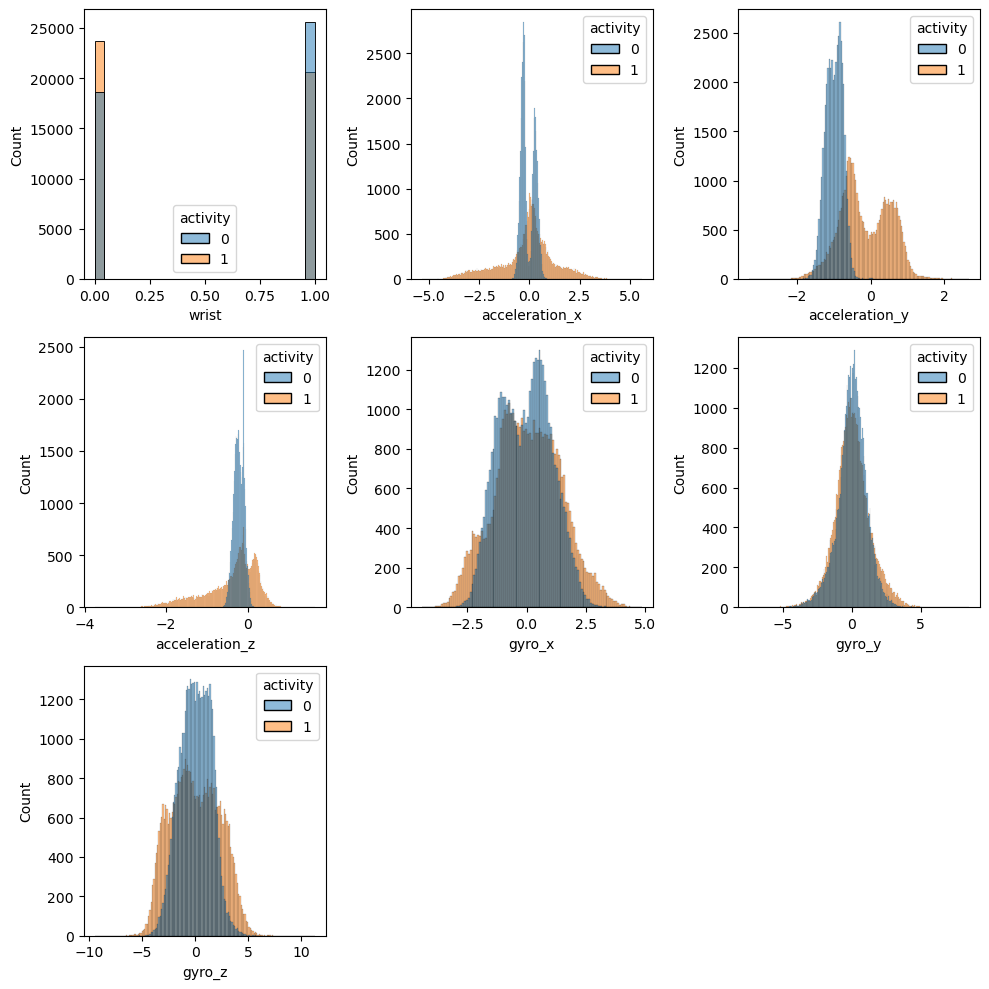

In [ ]:
#SUBPLOT - input vs target
plt.figure(figsize=(10,10))
plotnumber = 1

for i in df.drop('activity',axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=df[i], hue=df['activity'])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [ ]:
#insight: for all the acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z, if columns values increases the activity of 1 (run) increase

## Pair plot
Multivariate Analysis

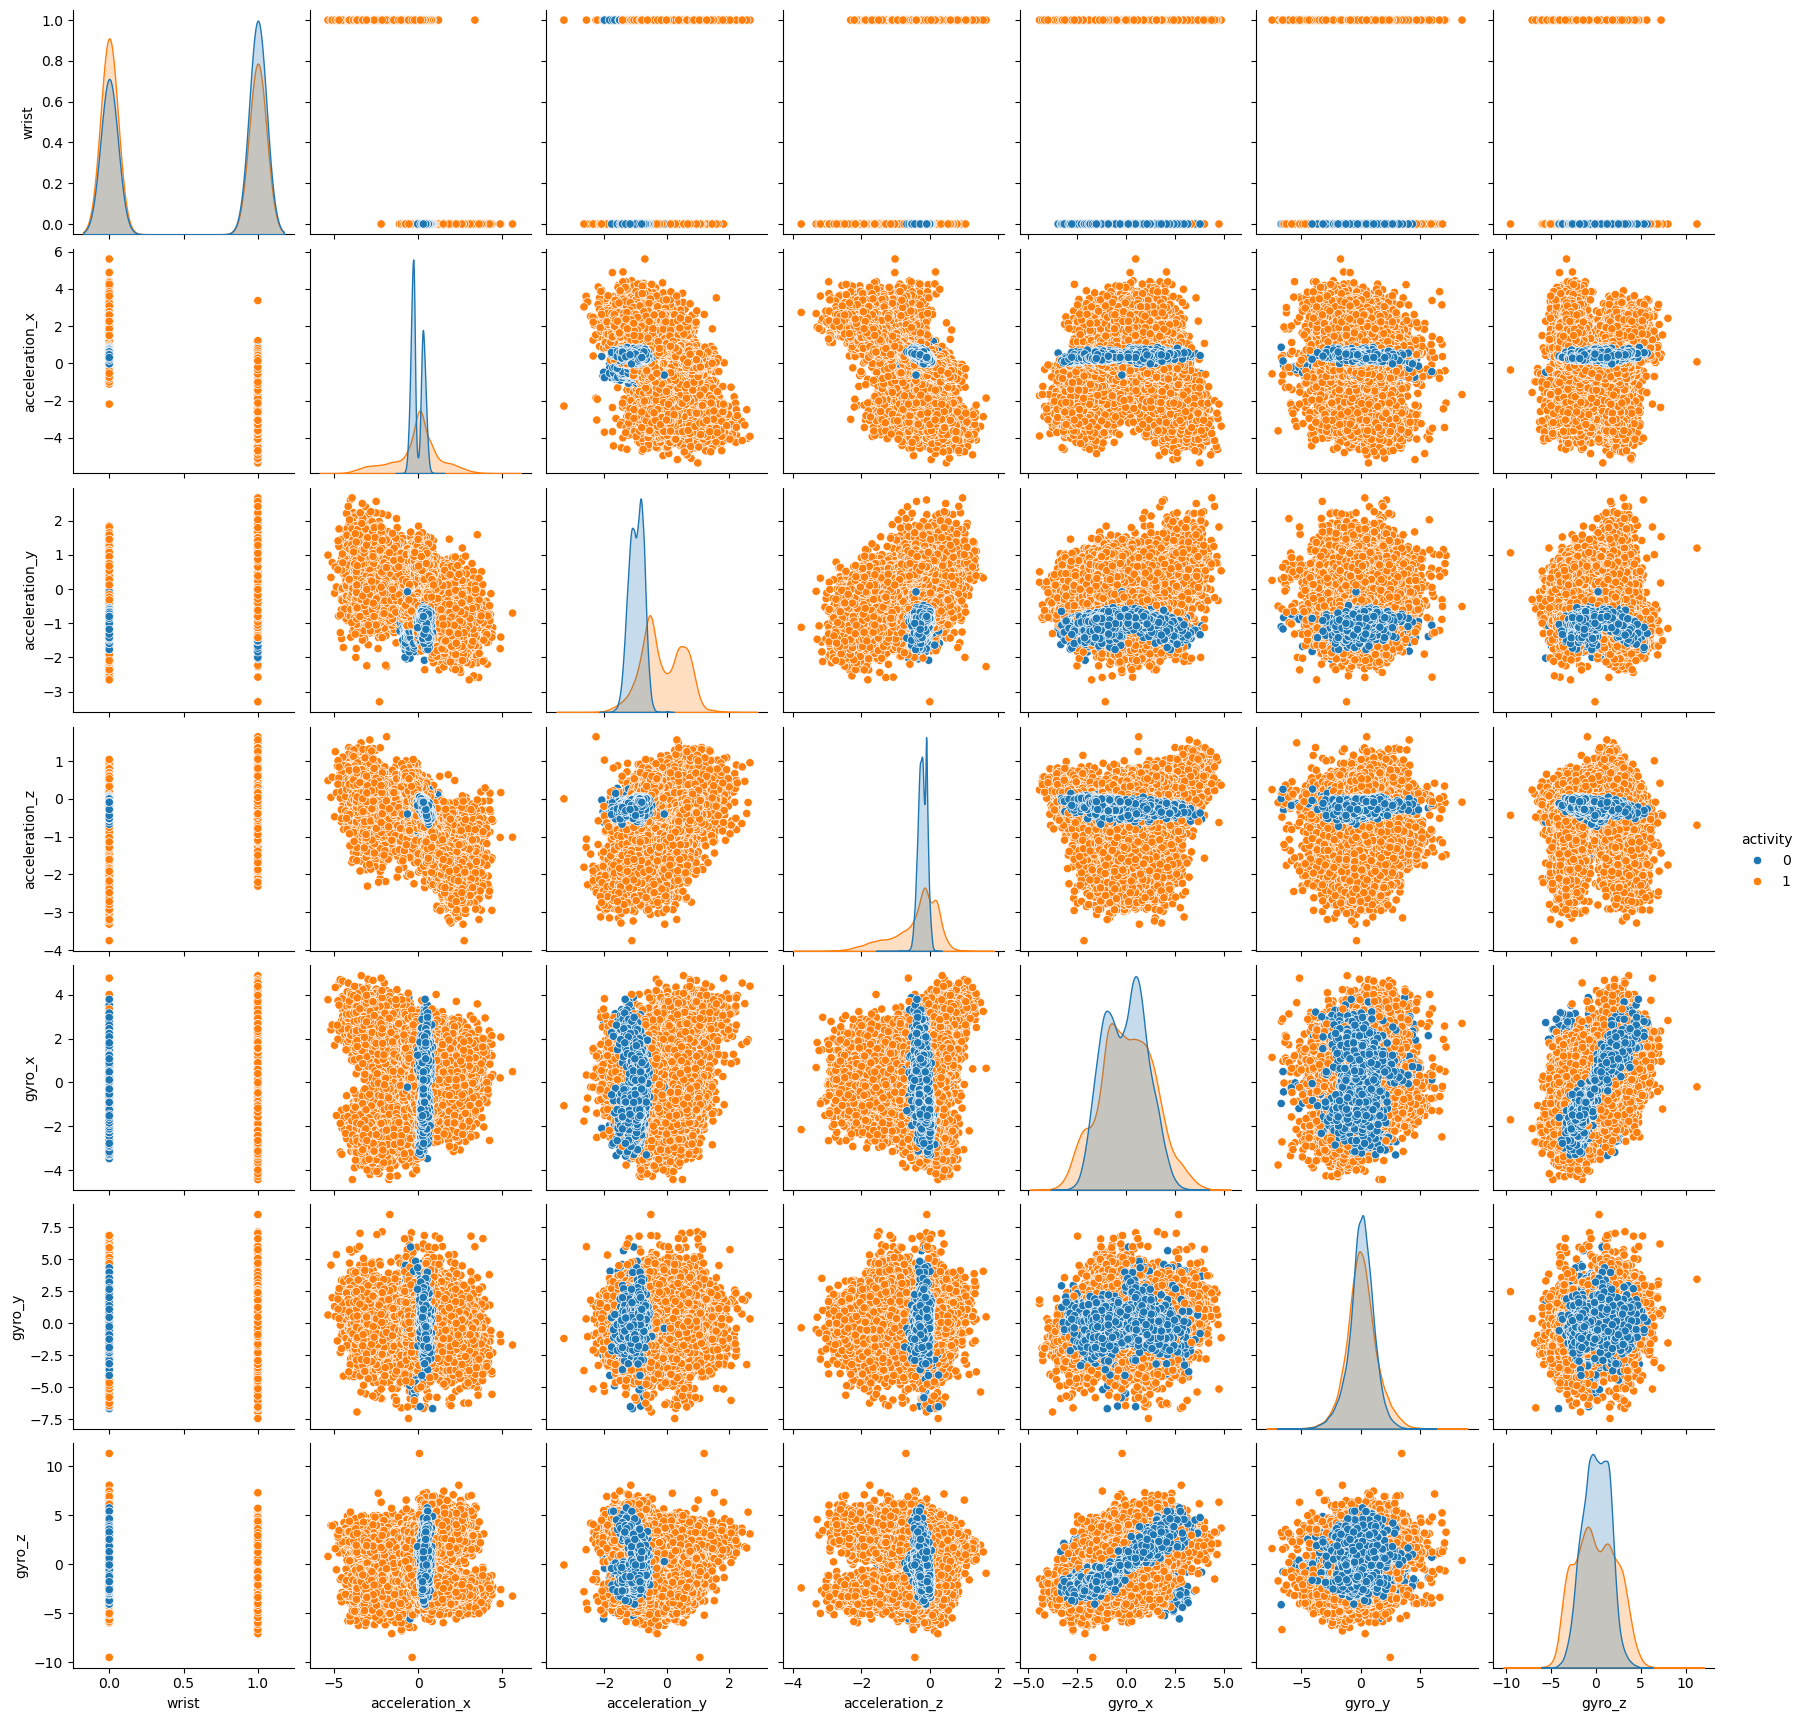

In [ ]:
sns.pairplot(df,hue='activity')

 insight: if we comsider orange for RUN & blue for WALK then as we can conclude if the values of columns increases the activity of run(1/orange) is increases
 same for every columns.

## Pre processing

In [ ]:
#null values
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#df.describe()

In [ ]:
#insight: no constant column present here to drop

In [ ]:
#outlier detection
#handling outlier is very important for the model to fit
# plot a box plot and then decide whether a column has a outlier or not

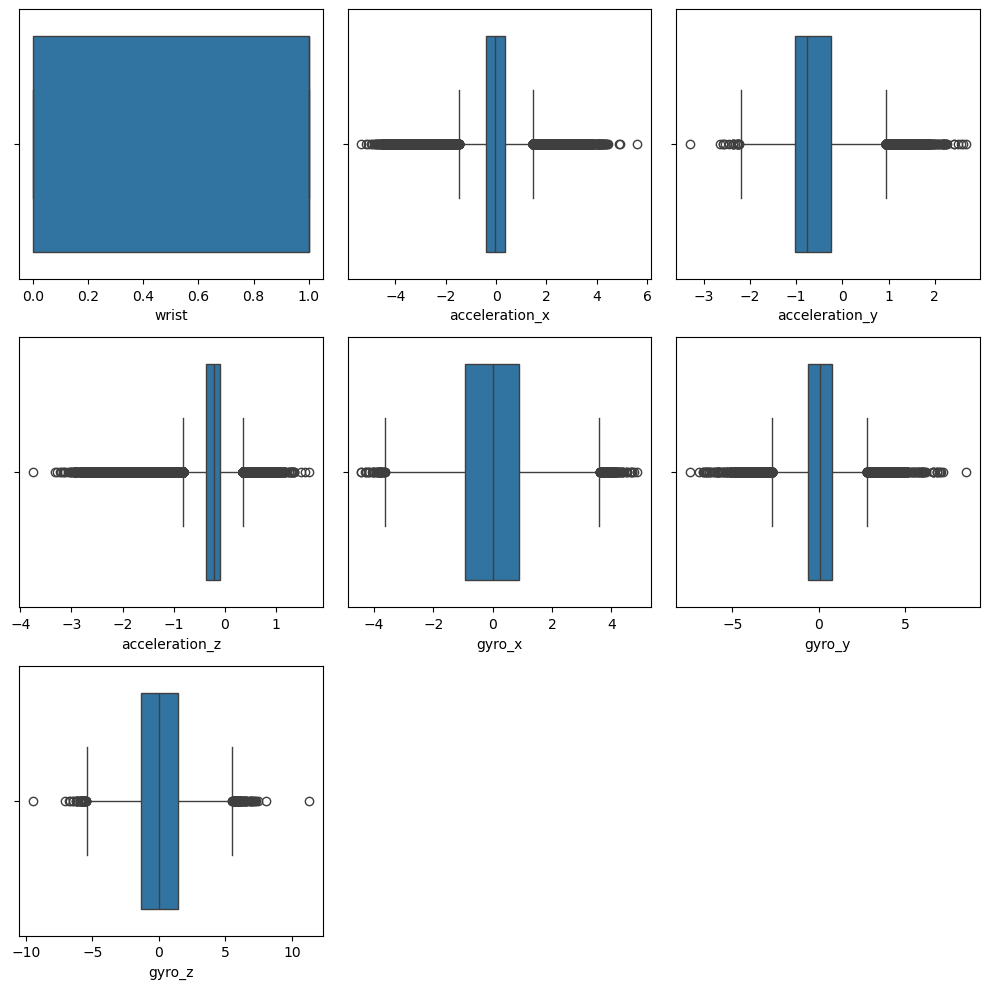

In [ ]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1

for i in df.drop('activity',axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()


<Axes: xlabel='acceleration_x'>

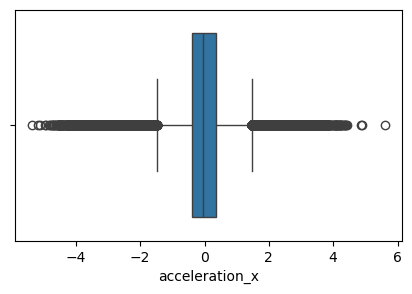

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['acceleration_x'])

In [ ]:
#insight:each col has outliers so we use IQR to handle outlier
#q1
#q3
#iqr
#lower=q1-1.5*iqr
#upper = q3+ 1.5*iqr

In [ ]:
q1= df['acceleration_y'].quantile(0.25)
q1

-1.0335

In [ ]:
q3 = df['acceleration_y'].quantile(0.75)
q3

-0.241775

In [ ]:
iqr = q3-q1
iqr

0.7917250000000001

In [ ]:
lower = q1-1.5*iqr
lower

-2.2210875000000003

In [ ]:
upper = q3+1.5*iqr
upper

0.9458125000000003

In [ ]:
#check every ROW is less than lower bond/limit
df.loc[df['acceleration_y']<lower]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
8543,2017-7-11,17:42:56:487833976,viktor,1,1,-3.0482,-2.2451,-1.8759,-1.3992,-2.3370,-3.3193
10214,2017-7-11,17:49:58:345283985,viktor,1,1,-1.8703,-2.2693,1.6403,0.6478,0.4910,-0.9244
10216,2017-7-11,17:49:58:745341002,viktor,1,1,-2.2993,-3.2990,-0.0016,-1.0608,-1.2019,-0.0761
10332,2017-7-11,17:50:2:553035974,viktor,1,1,-1.9295,-2.2278,-2.1881,-0.2238,-0.0462,-1.7832
50569,2017-7-17,20:10:49:683843970,viktor,1,1,3.3692,-2.5771,-1.0668,0.3401,5.9783,-3.9640
64225,2017-7-4,19:32:44:797133028,viktor,0,1,0.3944,-2.3603,-2.3496,1.4271,1.4882,3.2883
64878,2017-7-4,19:38:20:897745013,viktor,0,1,2.0664,-2.3314,-2.0301,1.5704,0.3080,3.2379
65825,2017-7-4,19:45:41:346678018,viktor,0,1,2.3162,-2.2479,-2.3430,-2.5099,0.7225,-1.5854
69839,2017-7-6,18:38:20:443379998,viktor,0,1,3.6007,-2.5874,-1.2846,-1.2192,0.3319,1.4732
71814,2017-7-6,18:45:56:408940970,viktor,0,1,1.2493,-2.3646,-1.7842,1.5406,-0.9656,2.5057


In [ ]:
df.loc[df['acceleration_y']>upper]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
803,2017-6-30,20:33:53:857743978,viktor,0,1,0.5458,1.0347,-0.2085,-1.3673,0.6324,0.7227
814,2017-6-30,20:34:3:357452988,viktor,0,1,0.0456,1.0885,-0.2076,0.0650,-0.2160,-1.0235
818,2017-6-30,20:34:4:157447993,viktor,0,1,0.1848,0.9479,-0.2640,-0.1240,0.0956,-0.6674
822,2017-6-30,20:34:4:957527995,viktor,0,1,-0.0065,0.9514,-0.0914,-0.3194,0.1613,-0.5796
826,2017-6-30,20:34:5:757667005,viktor,0,1,0.1477,1.0921,-0.2145,0.4663,-0.2417,-1.7537
...,...,...,...,...,...,...,...,...,...,...,...
87635,2017-7-9,20:6:31:516337990,viktor,0,1,0.5270,1.0484,-0.5358,-0.6155,-0.9295,-0.3219
87639,2017-7-9,20:6:32:315617978,viktor,0,1,0.0657,1.0242,-0.2410,-0.7306,-0.1505,-1.1490
87643,2017-7-9,20:6:33:116357982,viktor,0,1,-0.2425,0.9598,-0.1213,-0.1654,-0.0856,-2.0006
87709,2017-7-9,20:6:6:716341972,viktor,0,1,-0.1979,1.0738,-0.0464,-1.0136,0.7744,-0.7605


In [ ]:
#% of outlier
# if % of outlier is 5 or below 5 then only handle
# if % of outlier is > than 5 10,20 dont do anything
len(df.loc[df['acceleration_y']>upper])

1570

In [ ]:
len(df)

88588

In [ ]:
len(df.loc[df['acceleration_y']>upper])/len(df)*100

1.772249063078521

In [ ]:
df.loc[df['acceleration_y']>upper,'acceleration_y']  = df['acceleration_y'].median()

In [ ]:
# Encoding
# Scaling is skipped here

In [ ]:
q1= df['acceleration_x'].quantile(0.25)
q3= df['acceleration_x'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
#lower
upper = q3+1.5*iqr
#upper
len(df.loc[df['acceleration_x']>upper])/len(df)*100
df.loc[df['acceleration_x']>upper,'acceleration_x']  = df['acceleration_x'].median()
q1
q3
iqr
lower
upper

1.2744499999999999

In [ ]:
upper

1.2744499999999999

In [ ]:
q1= df['acceleration_z'].quantile(0.25)
q3= df['acceleration_z'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
#lower
upper = q3+1.5*iqr
#upper
len(df.loc[df['acceleration_z']>upper])/len(df)*100
df.loc[df['acceleration_z']>upper,'acceleration_z']  = df['acceleration_z'].median()
upper

0.34925000000000006

In [ ]:
q1= df['gyro_z'].quantile(0.25)
q3= df['gyro_z'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
#lower
upper = q3+1.5*iqr
#upper
len(df.loc[df['gyro_z']>upper])/len(df)*100
df.loc[df['gyro_z']>upper,'gyro_z']  = df['gyro_z'].median()
upper

5.5131875

In [ ]:
q1= df['gyro_x'].quantile(0.25)
q3= df['gyro_x'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
#lower
upper = q3+1.5*iqr
#upper
len(df.loc[df['gyro_x']>upper])/len(df)*100
df.loc[df['gyro_x']>upper,'gyro_x']  = df['gyro_x'].median()
upper

3.6030499999999996

In [ ]:
q1= df['gyro_y'].quantile(0.25)
q3= df['gyro_y'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
#lower
upper = q3+1.5*iqr
#upper
len(df.loc[df['gyro_y']>upper])/len(df)*100
df.loc[df['gyro_y']>upper,'gyro_y']  = df['gyro_y'].median()
upper

2.8014875000000004

# Feature engineering / Feature selection

We are going to select the important features from the data, for the model to get trained


1. drop the irrelevant columns

2. heatmap and check the co relation values

In [ ]:
#drop the irrelevant columns
#df.drop(['date','time','username'],axis=1,inplace=True)


<Axes: >

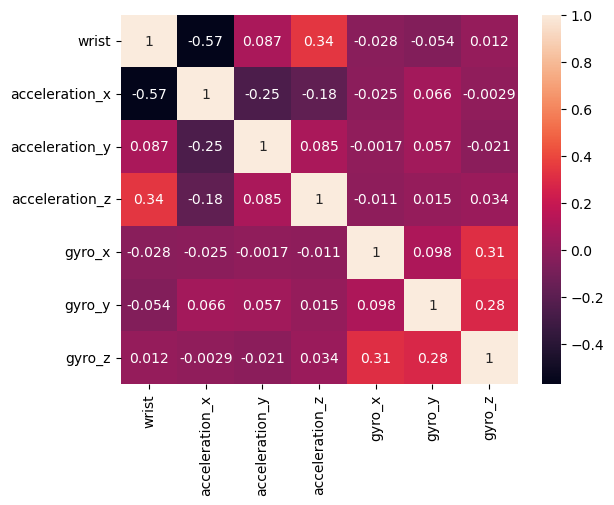

In [ ]:
sns.heatmap(df.drop('activity',axis=1).corr(),annot=True)

In [ ]:
# insight : no any two col has strong correlation(corr() value is more than 0.90 or 0.85) between them with reffrence to activity(target).
#no column is dropped all are retained for the model to learn on it

## Model building

In [ ]:
# 2. Drop non-numeric columns
df = df.drop(columns=['date', 'time', 'username'])

In [ ]:
# 3. Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop('activity', axis=1))

In [ ]:
# 4. Create sequences
timesteps = 50
X_seq, y_seq = [], []

for i in range(len(X_scaled) - timesteps):
    X_seq.append(X_scaled[i:i+timesteps])
    y_seq.append(df['activity'].values[i + timesteps])

X = np.array(X_seq)
y = np.array(y_seq)


In [ ]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
# 6. Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, X.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# 7. Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.6593 - loss: 0.6261 - val_accuracy: 0.3869 - val_loss: 0.7920
Epoch 2/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.6424 - loss: 0.6331 - val_accuracy: 0.3869 - val_loss: 0.7575
Epoch 3/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.6171 - loss: 0.6520 - val_accuracy: 0.3869 - val_loss: 1.1901
Epoch 4/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.6695 - loss: 0.5806 - val_accuracy: 0.3869 - val_loss: 0.9656
Epoch 5/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.8289 - loss: 0.4156 - val_accuracy: 0.3869 - val_loss: 0.7629
Epoch 6/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.5908 - loss: 0.6685 - val_accuracy: 0.3869 - val_loss: 0.7424
Epoch 7/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.6748 - loss: 0.6028 - val_accuracy: 0.3869 - val_loss: 0.7351
Epoch 8/10
886/886 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.7210 - loss: 0.5257 - 

In [ ]:
# 8. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9980 - loss: 0.0165
Test Accuracy: 0.9953


## Logistic regrassion
model building

In [ ]:
# Features and target
X = df.drop('activity', axis=1)
y = df['activity']

In [ ]:
# Normalize feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
#import libraries


# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:

# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[8411  502]
 [1533 7272]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8913
           1       0.94      0.83      0.88      8805

    accuracy                           0.89     17718
   macro avg       0.89      0.88      0.88     17718
weighted avg       0.89      0.89      0.88     17718



## SVM
model buildings

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:

# Train an SVM classifier
svm = SVC(kernel='rbf')  # You can also try 'linear' or 'poly'
svm.fit(X_train_scaled, y_train)


SVC()

In [ ]:

# Predict on test set
y_pred = svm.predict(X_test_scaled)


In [ ]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[8855   58]
 [ 106 8699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718


Accuracy Score: 0.990743876284005


## Random Forest model buildings

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

# Predict on test set
y_pred = rf.predict(X_test_scaled)


In [ ]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[8829   84]
 [  68 8737]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718


Accuracy Score: 0.9914211536290778


Insight: From above models Random forest,LSTM,SVM is good to use as it has accuracy 0.99%